# Klasyfikacja zdolności kredytowej

## Import bibliotek


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from numpy.random import RandomState
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


## Wczytanie danych

In [2]:
credit_score = pd.read_csv('credit_score.csv', index_col=0)
credit_score

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


Skrócenie nazw kolumn w celu ułatwienia eksploracji danych

In [3]:
credit_score.rename({'SeriousDlqin2yrs': 'Serious 2yrs'}, axis=1, inplace=True)
credit_score.rename({'RevolvingUtilizationOfUnsecuredLines': 'Total_balance div'}, axis=1, inplace=True)
credit_score.rename({'NumberOfTime30-59DaysPastDueNotWorse': 'Time30-59 DaysPast'}, axis=1, inplace=True)
credit_score.rename({'NumberOfOpenCreditLinesAndLoans': 'Open CreditLines'}, axis=1, inplace=True)
credit_score.rename({'NumberOfTimes90DaysLate': 'Num90 DaysLate'}, axis=1, inplace=True)
credit_score.rename({'NumberRealEstateLoansOrLines': 'Number of mortgage'}, axis=1, inplace=True)
credit_score.rename({'NumberOfTime60-89DaysPastDueNotWorse': 'Num60-89 DaysPast'}, axis=1, inplace=True)
credit_score.rename({'NumberOfDependents': 'NumOf Depend'}, axis=1, inplace=True)

credit_score

,Serious 2yrs,Total_balance div,age,Time30-59 DaysPast,DebtRatio,MonthlyIncome,Open CreditLines,Num90 DaysLate,Number of mortgage,Num60-89 DaysPast,NumOf Depend
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [4]:
print('Zbiór zawiera {} obserwacji i {} zmiennych.'.format(credit_score.shape[0], credit_score.shape[1]))

Zbiór zawiera 150000 obserwacji i 11 zmiennych.


In [5]:
credit_score.columns

Index(['Serious 2yrs', 'Total_balance div', 'age', 'Time30-59 DaysPast',
       'DebtRatio', 'MonthlyIncome', 'Open CreditLines', 'Num90 DaysLate',
       'Number of mortgage', 'Num60-89 DaysPast', 'NumOf Depend'],
      dtype='object')

Powyższe dane przedstawiają informacje finansowe o kredytobiorcach. Zadaniem projektu jest określenie za pomocą modelu klasyfikacji, które osoby otrzymają pozytywną a które negatywną ocenę kredytową. 

Poniżej zamieszczone zmienne objaśniające (uwzględniono późniejszą zmianę nazw kolumn):

- SeriousDlqin2yrs (zmiana na: Serious 2yrs) - Informacja o wystąpieniu spóźnienia w spłacie o przynajmniej 90 dni w ostatnich 2 latach: 
    - 0 - oznacza brak opóźnień 
    - 1 - oznacza, że opóżnienia wystąpiły
- RevolvingUtilizationOfUnsecuredLines (zmiana na: Total_balance div) - łączne saldo na kartach kredytowych i osobistych liniach kredytowych (z wyłączeniem kredytów hipotecznych czy umów ratalnych) podzielone przez sumę limitów kredytowych
- Age - Wiek kredytobiorcy
- NumberOfTime30-59DaysPastDueNotWorse (zmiana na: Time30-59 DaysPast) - Liczba spóźnień w spłatach o 30-59 dni w ostatnich 2 latach
- DebtRatio - Stosunek obciążeń (miesięczne spłaty pożyczek, alimenty, koszty utrzymania) do miesięcznego dochodu brutto
- MonthlyIncome - miesięczny dochód
- NumberOfOpenCreditLinesAndLoans (zmiana na: Open CreditLines) - liczba otwartych linii kredytowych i pożyczkowych
- NumberOfTimes90DaysLate (zmiana na: Num90 DaysLate) - Liczba spóźnień w spłatach o więcej niż 90 dni
- NumberRealEstateLoansOrLines (zmiana na: Number of mortgage) - Liczba kredytów hipoteczych
- NumberOfTime60-89DaysPastDueNotWorse (zmiana na: Num60-89 DaysPast) - Liczba spóźnień w spłatach o 60-89 dni
- NumberOfDependents (zmiana na: NumOf Depend) - Liczba osób na utrzymaniu (małżonek, dzieci)

## Przygotowanie i eksploracja danych

In [6]:
print(f"Kolumny w naszym DataFrame credit_score mają następujące typy: \n\n{credit_score.dtypes}")

Kolumny w naszym DataFrame credit_score mają następujące typy: 

Serious 2yrs            int64
Total_balance div     float64
age                     int64
Time30-59 DaysPast      int64
DebtRatio             float64
MonthlyIncome         float64
Open CreditLines        int64
Num90 DaysLate          int64
Number of mortgage      int64
Num60-89 DaysPast       int64
NumOf Depend          float64
dtype: object


In [7]:
print(f"Wyswietlenie, w których kolumnach występują wartości nullowe (True) \n\n{credit_score.isnull().any()}")
print()
print()
print(f"Suma wszystkich wartości nullowych w DF wynosi: {credit_score.isnull().sum().sum()}")

Wyswietlenie, w których kolumnach występują wartości nullowe (True) 

Serious 2yrs          False
Total_balance div     False
age                   False
Time30-59 DaysPast    False
DebtRatio             False
MonthlyIncome          True
Open CreditLines      False
Num90 DaysLate        False
Number of mortgage    False
Num60-89 DaysPast     False
NumOf Depend           True
dtype: bool


Suma wszystkich wartości nullowych w DF wynosi: 33655


In [8]:
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Serious 2yrs        150000 non-null  int64  
 1   Total_balance div   150000 non-null  float64
 2   age                 150000 non-null  int64  
 3   Time30-59 DaysPast  150000 non-null  int64  
 4   DebtRatio           150000 non-null  float64
 5   MonthlyIncome       120269 non-null  float64
 6   Open CreditLines    150000 non-null  int64  
 7   Num90 DaysLate      150000 non-null  int64  
 8   Number of mortgage  150000 non-null  int64  
 9   Num60-89 DaysPast   150000 non-null  int64  
 10  NumOf Depend        146076 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [9]:
summary = pd.DataFrame(credit_score.dtypes, columns=['Dtype'])
summary['Nulls'] = pd.DataFrame(credit_score.isnull().any())
summary['Sum_of_nulls'] = pd.DataFrame(credit_score.isnull().sum())
summary['Per_of_nulls'] = round((credit_score.apply(pd.isnull).mean()*100), 2)
summary.Dtype = summary.Dtype.astype(str)
summary

,Dtype,Nulls,Sum_of_nulls,Per_of_nulls
Serious 2yrs,int64,False,0,0.00
Total_balance div,float64,False,0,0.00
age,int64,False,0,0.00
Time30-59 DaysPast,int64,False,0,0.00
DebtRatio,float64,False,0,0.00
MonthlyIncome,float64,True,29731,19.82
Open CreditLines,int64,False,0,0.00
Num90 DaysLate,int64,False,0,0.00
Number of mortgage,int64,False,0,0.00
Num60-89 DaysPast,int64,False,0,0.00


In [10]:
print(str(round(credit_score['MonthlyIncome'].isnull().sum()/credit_score['MonthlyIncome'].shape[0]*100,2))+'% obserwacji w kolumnie MonthlyIncome zawiera braki w danych.')
print(str(round(credit_score['NumOf Depend'].isnull().sum()/credit_score['NumOf Depend'].shape[0]*100,2))+'% obserwacji w kolumnie NumOf Depend zawiera braki w danych.')

19.82% obserwacji w kolumnie MonthlyIncome zawiera braki w danych.
2.62% obserwacji w kolumnie NumOf Depend zawiera braki w danych.


Dla lepszej oceny sytuacji zobaczymy jak rozkładają się dane w naszym zbiorze

In [11]:
credit_score.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Serious 2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
Total_balance div,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
Time30-59 DaysPast,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
Open CreditLines,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
Num90 DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
Number of mortgage,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
Num60-89 DaysPast,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


Średnia (mean) jest większa niż mediana (50%) w większości przypadków, więc możemy się spodziewać, że rozkład będzie skośny.


W dwóch kolumnach: MonthlyIncome i NumOf Depend znajdują się puste wartości.

W kolumnie MonthlyIncome jest tych wartości 29731 co stanowi 19.82% obserwacji.

W kolumnie NumOf Depend jest tych wartości 3924 co stanowi 2.62% obserwacji.

Zdecydowaliśmy o zastąpieniu wartości nullowych w całym zbiorze:

- w kolumnie MonthlyIncome zostaną zastąpione wartością średnią (mean)

- w kolumnie NumOf Depend zostaną zastąpione wartością najczęściej występującą (mode)


In [12]:
mean_MonthlyIncome = credit_score['MonthlyIncome'].mean()
mode_NumOf_Depend = credit_score['NumOf Depend'].mode()[0]

In [13]:
credit_score['MonthlyIncome'] = credit_score['MonthlyIncome'].fillna(mean_MonthlyIncome)
credit_score['NumOf Depend'] = credit_score['NumOf Depend'].fillna(mode_NumOf_Depend)

In [14]:
credit_score['MonthlyIncome'] = credit_score['MonthlyIncome'].fillna(mean_MonthlyIncome)
credit_score['NumOf Depend'] = credit_score['NumOf Depend'].fillna(mode_NumOf_Depend)

In [15]:
summary = pd.DataFrame(credit_score.dtypes, columns=['Dtype'])
summary['Nulls'] = pd.DataFrame(credit_score.isnull().any())
summary['Sum_of_nulls'] = pd.DataFrame(credit_score.isnull().sum())
summary['Per_of_nulls'] = round((credit_score.apply(pd.isnull).mean()*100), 2)
summary.Dtype = summary.Dtype.astype(str)
summary

,Dtype,Nulls,Sum_of_nulls,Per_of_nulls
Serious 2yrs,int64,False,0,0.0
Total_balance div,float64,False,0,0.0
age,int64,False,0,0.0
Time30-59 DaysPast,int64,False,0,0.0
DebtRatio,float64,False,0,0.0
MonthlyIncome,float64,False,0,0.0
Open CreditLines,int64,False,0,0.0
Num90 DaysLate,int64,False,0,0.0
Number of mortgage,int64,False,0,0.0
Num60-89 DaysPast,int64,False,0,0.0


### Sprawdzamy jaka jest korelacja pomiędzy naszymi danymi i jak wpływają na nasz target.

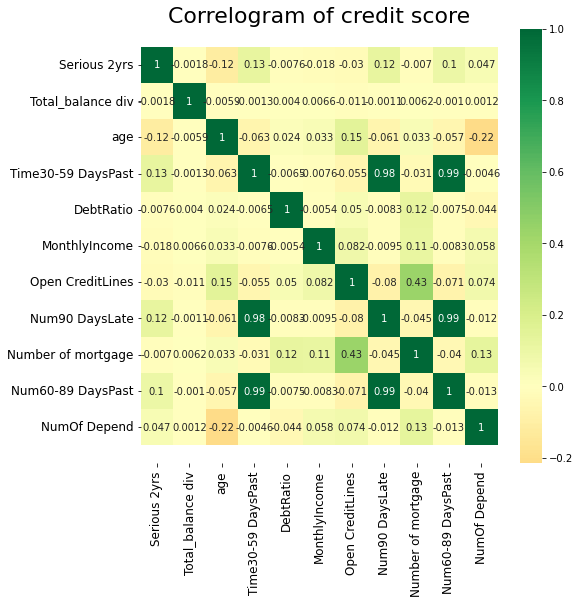

In [16]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(credit_score.corr(), 
                 xticklabels=credit_score.corr().columns, 
                 yticklabels=credit_score.corr().columns, 
                 cmap='RdYlGn', 
                 center=0, 
                 annot=True)

plt.title('Correlogram of credit score', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Na podstawie wykresu korelacji widzimy dużą zależność nie których danych takich jak Time30-59 DaysPast, Num60-89 DaysPast, Num90 DaysLate, co potwierdza wykres korelacji dla tych trzech kolumn poniżej

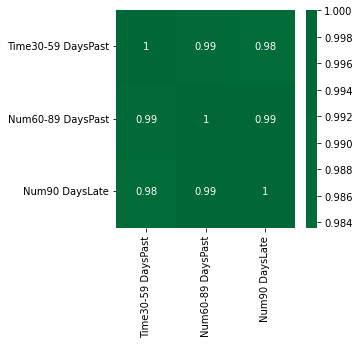

In [17]:
overdue = credit_score.loc[:, ['Time30-59 DaysPast', 'Num60-89 DaysPast', 'Num90 DaysLate']]

plt.figure(figsize=(4, 4))
ax = sns.heatmap(overdue.corr(), cmap='RdYlGn', center=0, annot=True)
plt.show()

Na tej podstawie postanowiliśmy dodać dodatkową kolumnę 'mean30-90 DaysPast', która zastąpi te trzy kolumny i będzie wartością średnią z tych obserwacji

In [18]:
credit_score['mean30-90 DaysPast'] = (credit_score['Time30-59 DaysPast'] + credit_score['Num60-89 DaysPast'] + credit_score['Num90 DaysLate'])/3
credit_score

,Serious 2yrs,Total_balance div,age,Time30-59 DaysPast,DebtRatio,MonthlyIncome,Open CreditLines,Num90 DaysLate,Number of mortgage,Num60-89 DaysPast,NumOf Depend,mean30-90 DaysPast
1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0,0.666667
2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0,0.000000
3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0,0.666667
4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0,0.000000
5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0,0.000000
149997,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0,0.000000
149998,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0,0.000000
149999,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0,0.000000


In [19]:
credit_score.drop(['Time30-59 DaysPast'], axis=1, inplace=True)
credit_score.drop(['Num60-89 DaysPast'], axis=1, inplace=True)
credit_score.drop(['Num90 DaysLate'], axis=1, inplace=True)
credit_score


,Serious 2yrs,Total_balance div,age,DebtRatio,MonthlyIncome,Open CreditLines,Number of mortgage,NumOf Depend,mean30-90 DaysPast
1,1,0.766127,45,0.802982,9120.000000,13,6,2.0,0.666667
2,0,0.957151,40,0.121876,2600.000000,4,0,1.0,0.000000
3,0,0.658180,38,0.085113,3042.000000,2,0,0.0,0.666667
4,0,0.233810,30,0.036050,3300.000000,5,0,0.0,0.000000
5,0,0.907239,49,0.024926,63588.000000,7,1,0.0,0.333333
...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0.225131,2100.000000,4,1,0.0,0.000000
149997,0,0.299745,44,0.716562,5584.000000,4,1,2.0,0.000000
149998,0,0.246044,58,3870.000000,6670.221237,18,1,0.0,0.000000
149999,0,0.000000,30,0.000000,5716.000000,4,0,0.0,0.000000


## Podział danych na X i y

In [20]:
y = credit_score['Serious 2yrs']
display(y)

X = credit_score.drop(['Serious 2yrs'], axis=1)
display(X)

1         1
2         0
3         0
4         0
5         0
         ..
149996    0
149997    0
149998    0
149999    0
150000    0
Name: Serious 2yrs, Length: 150000, dtype: int64

,Total_balance div,age,DebtRatio,MonthlyIncome,Open CreditLines,Number of mortgage,NumOf Depend,mean30-90 DaysPast
1,0.766127,45,0.802982,9120.000000,13,6,2.0,0.666667
2,0.957151,40,0.121876,2600.000000,4,0,1.0,0.000000
3,0.658180,38,0.085113,3042.000000,2,0,0.0,0.666667
4,0.233810,30,0.036050,3300.000000,5,0,0.0,0.000000
5,0.907239,49,0.024926,63588.000000,7,1,0.0,0.333333
...,...,...,...,...,...,...,...,...
149996,0.040674,74,0.225131,2100.000000,4,1,0.0,0.000000
149997,0.299745,44,0.716562,5584.000000,4,1,2.0,0.000000
149998,0.246044,58,3870.000000,6670.221237,18,1,0.0,0.000000
149999,0.000000,30,0.000000,5716.000000,4,0,0.0,0.000000


Sprawdzimy ile wartości unikalnych mamy w 'Serious 2yrs'

In [21]:
credit_score['Serious 2yrs'].value_counts(normalize = True)

0    0.93316
1    0.06684
Name: Serious 2yrs, dtype: float64

### Robimy wykres korelacji, boxplot oraz histogram dla naszego X

Sprawdzamy jak po zmianach wygląda wykres korelacji naszego Data Frame.

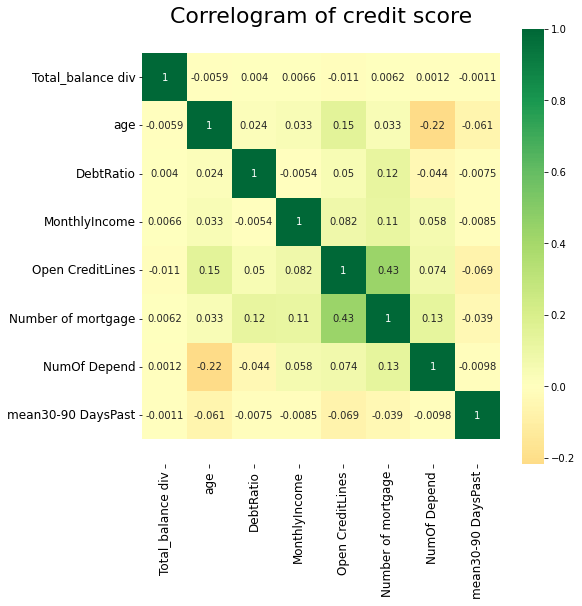

In [22]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(), 
                 xticklabels=X.corr().columns, 
                 yticklabels=X.corr().columns, 
                 cmap='RdYlGn', 
                 center=0, 
                 annot=True)

plt.title('Correlogram of credit score', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Widzimy, że najwiesza korelacja występuje pomiędzy Open CreditLines czyli liczbą otwartych linii kredytowych i pożyczkowych a Number of mortgage, czyli liczbą kredytów hipoteczych

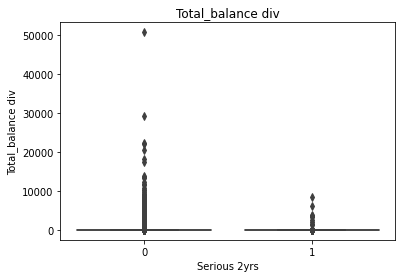

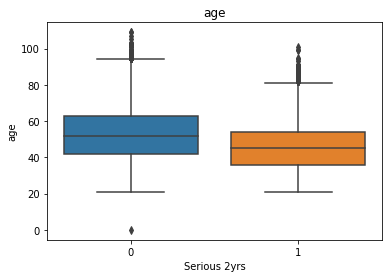

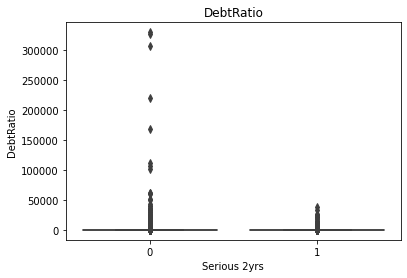

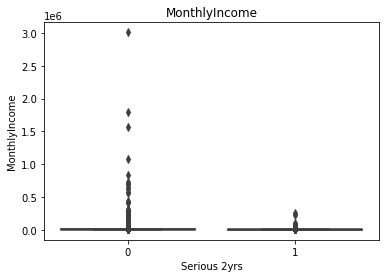

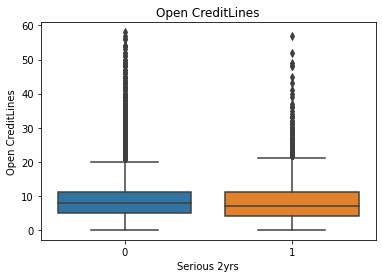

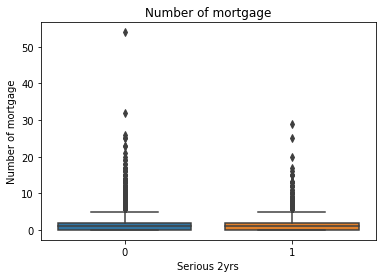

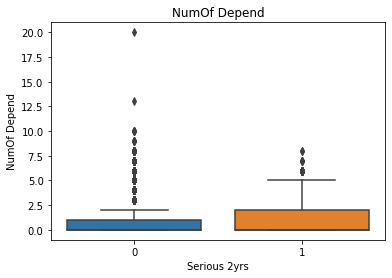

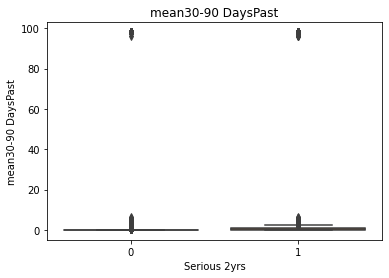

In [23]:
for col in X.columns:
    sns.boxplot(x=y, y=X[col])
    plt.title(f'{col}')
    plt.show()


Jak widać większość osób, posiadająca karty kredytowe i osobiste linie kredytowe miało opóźnienia w spłacie o przynajmniej 90 dni w ostatnich 2 latach. Wiek osób nie ma większego znaczenia, gdyż dla tych mających opóżnienia i nie rozkłada się mniej więcej w podobny zakresie.
Liczba otwartych linii kredytowych oraz posiadanie kredytów hipotecznych nie ma większego wpływu na opóźnienia w spłacie.
Liczba opóźnień w spłacie jest większa u osób, które nie mają, lub mają mniejszą liczbę osób w gospodarstwie domowym.

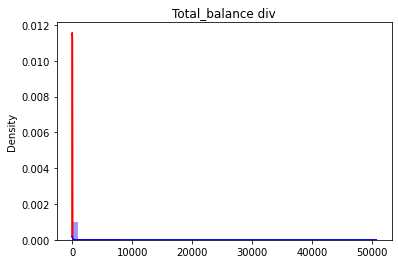

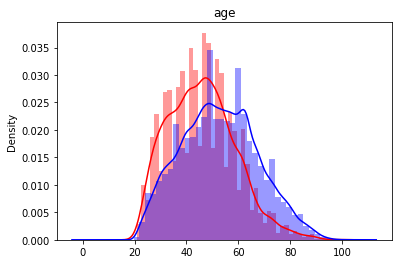

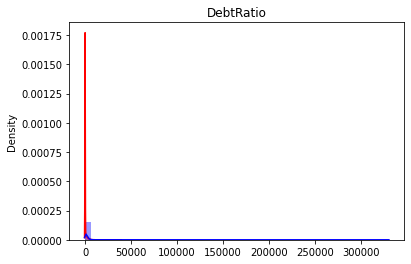

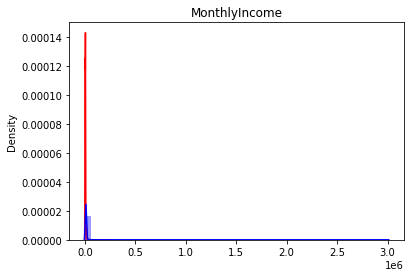

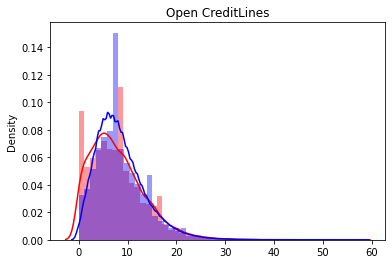

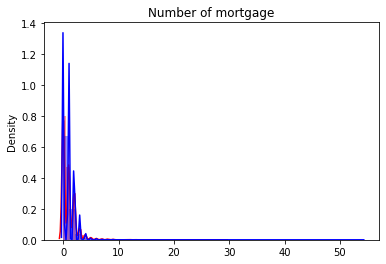

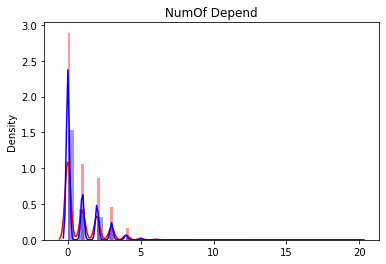

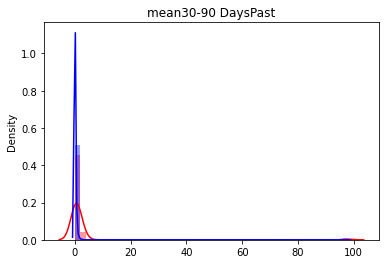

In [24]:
for column in X.columns:
    sns.distplot(credit_score.loc[credit_score['Serious 2yrs']==1,[column]],kde=True,rug=False,color='r')
    sns.distplot(credit_score.loc[credit_score['Serious 2yrs']==0,[column]],kde=True,rug=False,color='b')
    plt.title(column)
    plt.show()

## Podział danych na zbiór treningowy i testowy

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60, stratify=y)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 120000
Test cases: 30000


## Tworzymy model drzewa decyzyjnego - Baseline model

In [26]:
model_tree = DecisionTreeClassifier(min_samples_leaf=3, max_depth=5)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

### Tworzymy predykcję na podstawie naszego modelu

In [27]:
prediction = model_tree.predict(X_test)

### funkcja - obliczanie najważniejszych metryk oraz rysowanie wykresów

In [28]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe

models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_test)
    predictions_proba = model.predict_proba(X_test)
    predictions_proba_list.append(predictions_proba[:,1])
    
    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_test, predictions))
    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_test, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()
    
    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
        
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    
    f1_metric = f1_score(y_test, predictions)
    auc_metric = roc_auc_score(y_test, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

### Ocena modelu Model_tree - Baseline

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27995
           1       0.55      0.15      0.24      2005

    accuracy                           0.94     30000
   macro avg       0.75      0.57      0.60     30000
weighted avg       0.92      0.94      0.92     30000



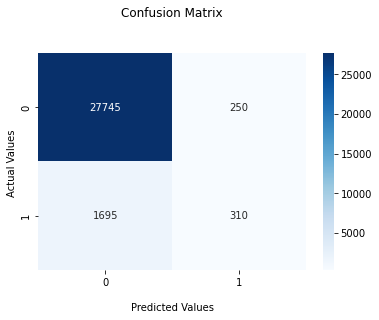

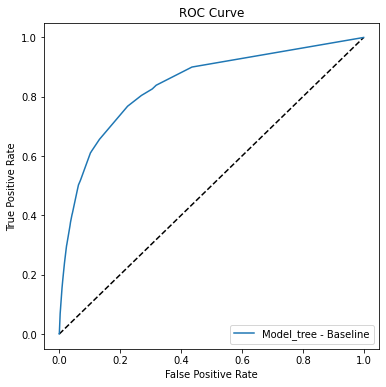

,Model,F1_score,AUC
0,Model_tree - Baseline,0.241715,0.840245


In [29]:
calculate_metrics(model_tree, 'Model_tree - Baseline')

F1 score  łączy precyzję i czułość. Im wyższy F1 score tym lepszy model. 

Jak widać  w naszym Modelu tree - Baseline wynik jest dość niski. 

Natomiast im wyższy wynik AUC tym lepiej klasyfikator wykonuje dane zadanie i tu poziom jest zadowalający.

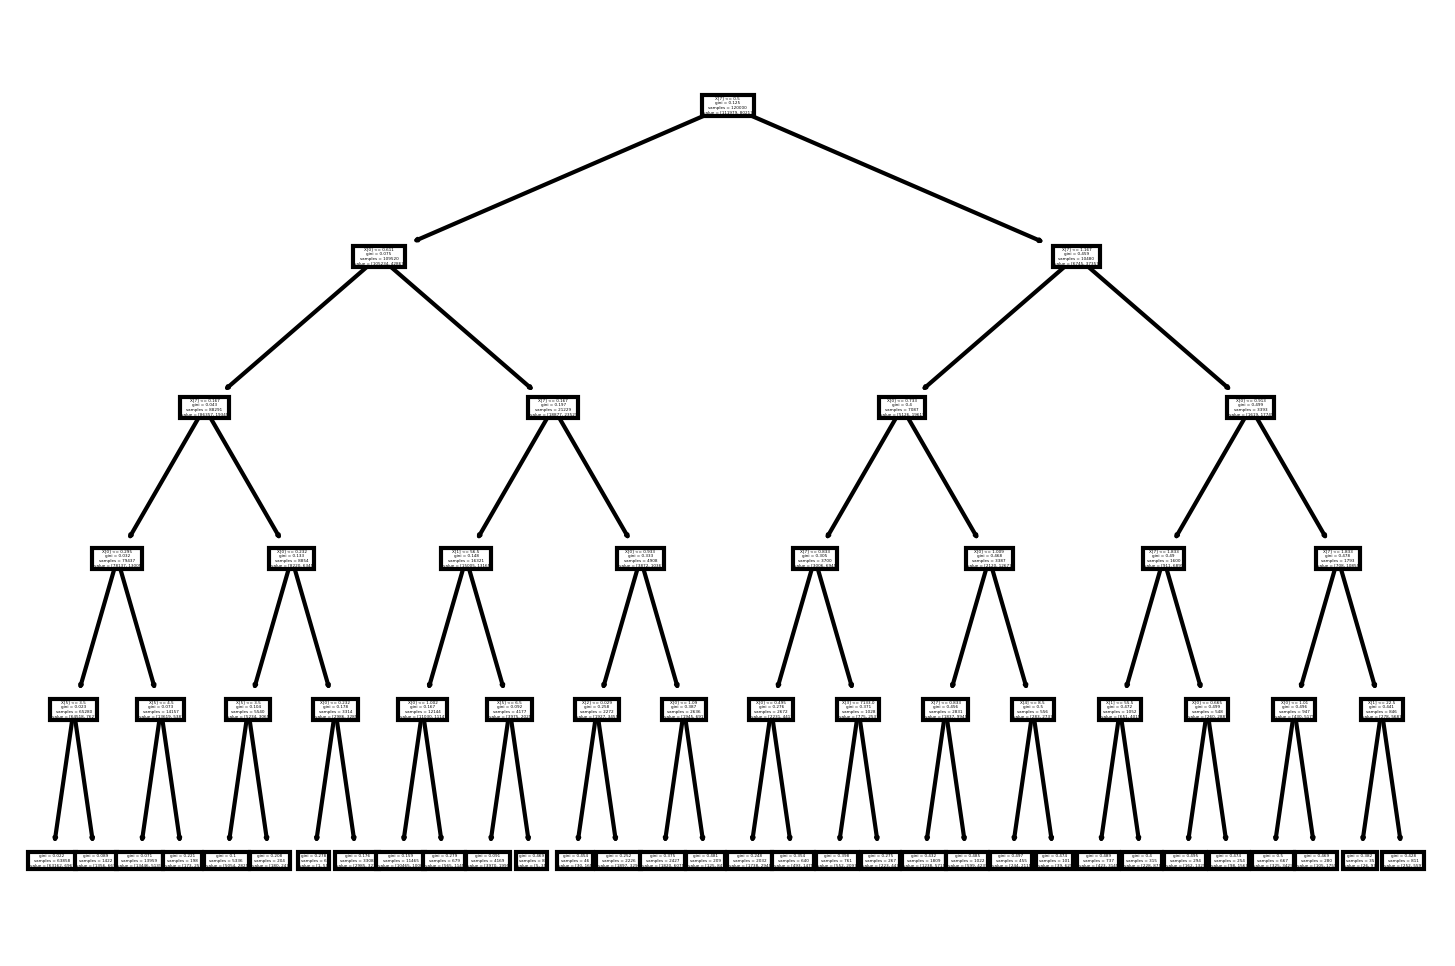

In [30]:
plt.figure(dpi=300)      
plot_tree(model_tree)
plt.show()

### Teraz tworzymy model drzewa decyzyjnego na zbalansowanych danych. 

### W tym celu wykorzystamy undersampling i oversampling dla naszego modelu drzewa

In [31]:
pd.Series(y_train).value_counts()

0    111979
1      8021
Name: Serious 2yrs, dtype: int64

#### Usuniemy losowo wartości dla zbioru treningowego

In [32]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=27)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [33]:
pd.Series(y_train_under).value_counts()

0    8021
1    8021
Name: Serious 2yrs, dtype: int64

### Underdampling 

In [34]:
model_tree_undersampled = DecisionTreeClassifier(min_samples_leaf=3, max_depth=5)
model_tree_undersampled.fit(X_train_under, y_train_under)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [35]:
prediction_tree_under = model_tree_undersampled.predict(X_test)

### Ocena modelu Tree undersampled

              precision    recall  f1-score   support

           0       0.98      0.74      0.85     27995
           1       0.18      0.81      0.30      2005

    accuracy                           0.75     30000
   macro avg       0.58      0.78      0.57     30000
weighted avg       0.93      0.75      0.81     30000



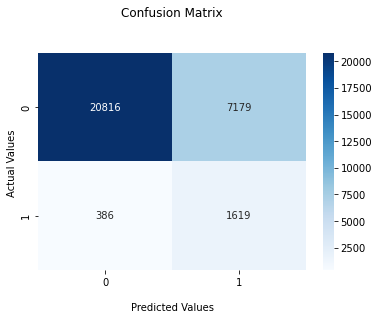

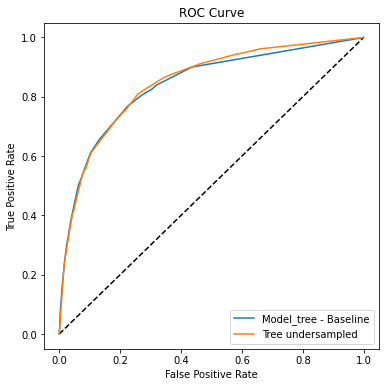

,Model,F1_score,AUC
0,Model_tree - Baseline,0.241715,0.840245
1,Tree undersampled,0.299732,0.847294


In [36]:
calculate_metrics(model_tree_undersampled, 'Tree undersampled')

Jak widać F1 score w naszym modelu Tree undersampled wynik się poprawił.


### Oversampling

In [37]:
oversample = RandomOverSampler(sampling_strategy='minority', random_state=27)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [38]:
model_tree_oversampled = DecisionTreeClassifier(min_samples_leaf=3, max_depth=5)
model_tree_oversampled.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [39]:
prediction_tree_over = model_tree_oversampled.predict(X_test)

In [40]:
pd.Series(y_train_over).value_counts()

1    111979
0    111979
Name: Serious 2yrs, dtype: int64

### Ocena modelu Tree oversampled

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     27995
           1       0.19      0.80      0.30      2005

    accuracy                           0.75     30000
   macro avg       0.58      0.77      0.57     30000
weighted avg       0.93      0.75      0.81     30000



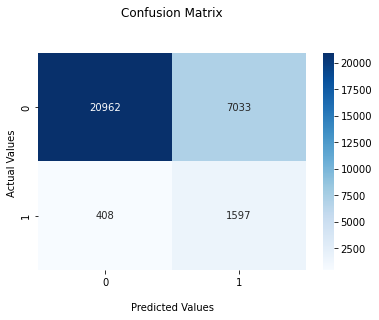

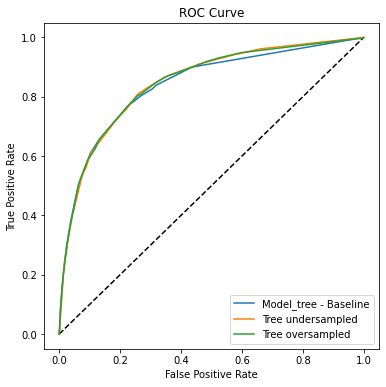

,Model,F1_score,AUC
0,Model_tree - Baseline,0.241715,0.840245
1,Tree undersampled,0.299732,0.847294
2,Tree oversampled,0.300329,0.847061


In [41]:
calculate_metrics(model_tree_oversampled, 'Tree oversampled')

Jak widać w naszym modelu Tree oversampled wynik F1 score jest jeszcze lepszy.

## Model Random Forest

In [42]:
model_forest = RandomForestClassifier(n_estimators=50, min_samples_leaf=3, max_depth=5)
model_forest.fit(X_train, y_train)
    

RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=50)

### Tworzymy predykcję na podstawie naszego modelu

In [43]:
prediction_forest = model_forest.predict(X_test)

In [44]:
random_forest = RandomForestClassifier(n_estimators=30, n_jobs=-1)

params_rf = {'max_depth': [2, 3, 5],
             'min_samples_leaf': [3, 5, 10]}

rf_gridsearch = GridSearchCV(random_forest,
                             params_rf, 
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)

rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)

rf_model = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best hyperparameter: {'max_depth': 5, 'min_samples_leaf': 10}


### Ocena modelu Random Forest

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     27995
           1       1.00      0.00      0.00      2005

    accuracy                           0.93     30000
   macro avg       0.97      0.50      0.48     30000
weighted avg       0.94      0.93      0.90     30000



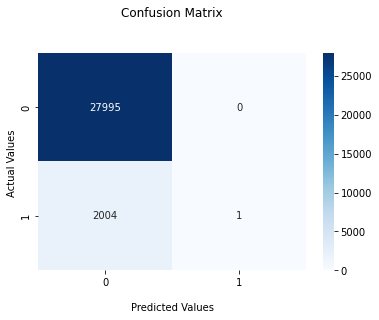

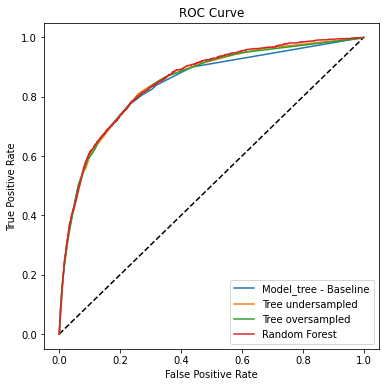

,Model,F1_score,AUC
0,Model_tree - Baseline,0.241715,0.840245
1,Tree undersampled,0.299732,0.847294
2,Tree oversampled,0.300329,0.847061
3,Random Forest,0.000997,0.852048


In [45]:
calculate_metrics(rf_model, 'Random Forest')

W naszym modelu Random Forest wynik F1 score jest niski.

Natomiast wynik AUC jest w dalszym ciągu zadowalający.

### Undersampling dla modelu Random Forest 

In [46]:
model_forest_undersampled = RandomForestClassifier(n_estimators=50, min_samples_leaf=3, max_depth=5)
model_forest_undersampled.fit(X_train_under, y_train_under)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=50)

In [47]:
prediction_forest_under = model_forest_undersampled.predict(X_test)

### Ocena modelu Random Forest undersampled

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     27995
           1       0.19      0.80      0.30      2005

    accuracy                           0.75     30000
   macro avg       0.58      0.77      0.58     30000
weighted avg       0.93      0.75      0.81     30000



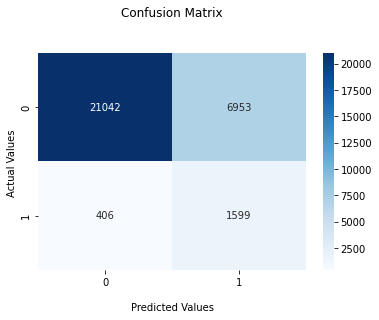

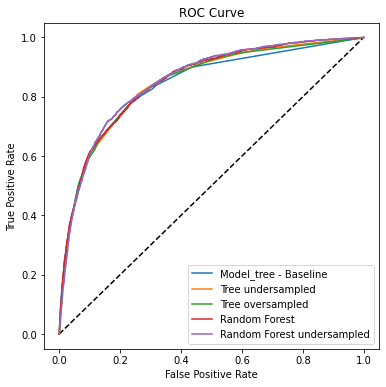

,Model,F1_score,AUC
0,Model_tree - Baseline,0.241715,0.840245
1,Tree undersampled,0.299732,0.847294
2,Tree oversampled,0.300329,0.847061
3,Random Forest,0.000997,0.852048
4,Random Forest undersampled,0.302927,0.853711


In [48]:
calculate_metrics(model_forest_undersampled, 'Random Forest undersampled')

W naszym modelu Random Forest undersampled wynik F1 score jest znacznie lepszy.

Wynik AUC jest w dalszym ciągu zadowalający.

In [49]:
model_forest_oversampled = RandomForestClassifier(min_samples_leaf=5, max_depth=10, random_state=27)
model_forest_oversampled.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=27)

In [50]:
prediction_forest_over = model_forest_oversampled.predict(X_test)

In [51]:
pd.Series(y_train_over).value_counts()

1    111979
0    111979
Name: Serious 2yrs, dtype: int64

### Ocena modelu Random Forest oversampled

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     27995
           1       0.22      0.75      0.34      2005

    accuracy                           0.81     30000
   macro avg       0.60      0.78      0.61     30000
weighted avg       0.93      0.81      0.85     30000



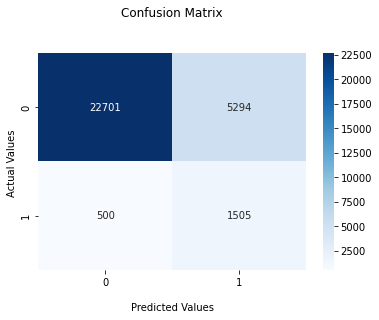

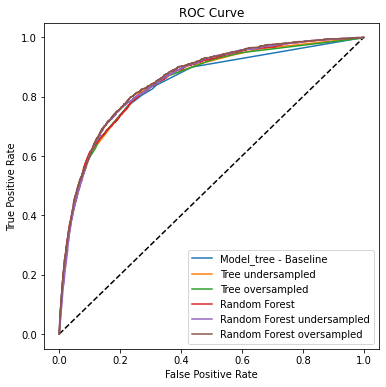

,Model,F1_score,AUC
0,Model_tree - Baseline,0.241715,0.840245
1,Tree undersampled,0.299732,0.847294
2,Tree oversampled,0.300329,0.847061
3,Random Forest,0.000997,0.852048
4,Random Forest undersampled,0.302927,0.853711
5,Random Forest oversampled,0.34189,0.85882


In [52]:
calculate_metrics(model_forest_oversampled, 'Random Forest oversampled')

W naszym modelu Random Forest oversampled wynik F1 score jest jeszcze lepszy.

Wynik AUC jest w dalszym ciągu zadowalający.


### Regresja Logistyczna

#### Trenowanie modelu regresji logistycznej

In [53]:
reg = 0.01

model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


In [54]:
predictions = model.predict(X_test)

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     27995
           1       0.44      0.01      0.03      2005

    accuracy                           0.93     30000
   macro avg       0.69      0.51      0.50     30000
weighted avg       0.90      0.93      0.90     30000



#### Macierz omyłek

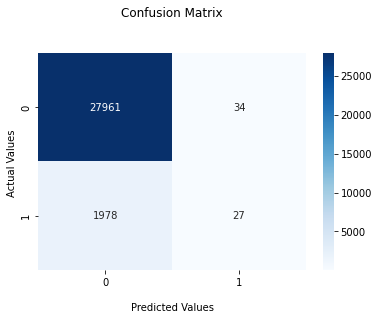

In [56]:
cm = confusion_matrix(y_test, predictions)

ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [57]:
logistic_regression_model = LogisticRegression(C=1/reg, solver="liblinear")

params_lr = {'C': [0.000000001, 0.00001, 0.0001, 0.001, 0.05, 0.01, 0.1]}

lr_gridsearch = GridSearchCV(logistic_regression_model,
                                params_lr, 
                                scoring='f1_macro',
                                cv=5,
                                verbose=10, n_jobs=-1)

lr_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', lr_gridsearch.best_params_)

lr_model = lr_gridsearch.best_estimator_

Fitting 5 folds for each of 7 candidates, totalling 35 fits

Best hyperparameter: {'C': 0.0001}


### Ocena modelu Logistic Regression

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     27995
           1       0.44      0.01      0.03      2005

    accuracy                           0.93     30000
   macro avg       0.69      0.51      0.50     30000
weighted avg       0.90      0.93      0.90     30000



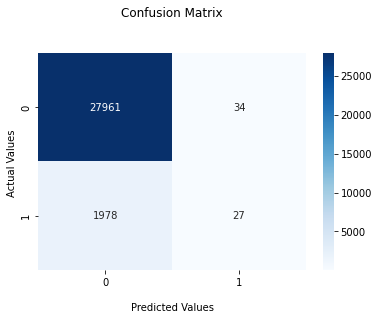

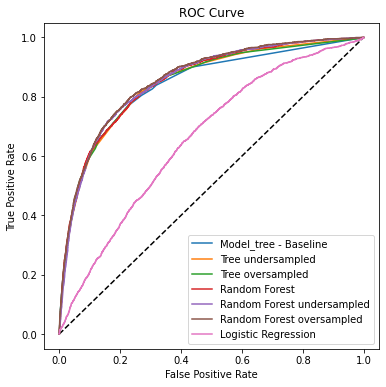

,Model,F1_score,AUC
0,Model_tree - Baseline,0.241715,0.840245
1,Tree undersampled,0.299732,0.847294
2,Tree oversampled,0.300329,0.847061
3,Random Forest,0.000997,0.852048
4,Random Forest undersampled,0.302927,0.853711
5,Random Forest oversampled,0.34189,0.85882
6,Logistic Regression,0.026137,0.658592


In [58]:
calculate_metrics(lr_model, 'Logistic Regression')

W naszym modelu Logistic Regression wynik F1 score jest gorszy niż w pozostałych modelach (z wyjątkiem Random Forest).

Wynik AUC jest niższy niż w pozostałych modelach.

### Model Regresji Logistycznej po standaryzacji

### Ocena modelu Logistic Regression scal

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression

reg = 0.01

model_scal = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model_scal)

LogisticRegression(C=100.0, solver='liblinear')


In [61]:
predictions = model_scal.predict(X_test)

In [62]:
from sklearn.model_selection import GridSearchCV

logistic_regression_scal_model = LogisticRegression(C=1/reg, solver="liblinear")

params_lr = {'C': [0.000000001, 0.00001, 0.0001, 0.001, 0.05, 0.01, 0.1]}

lr_scal_gridsearch = GridSearchCV(logistic_regression_scal_model,
                                params_lr, 
                                scoring='f1_macro',
                                cv=5,
                                verbose=10, n_jobs=-1)

lr_scal_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', lr_scal_gridsearch.best_params_)

lr_scal_model = lr_scal_gridsearch.best_estimator_

Fitting 5 folds for each of 7 candidates, totalling 35 fits

Best hyperparameter: {'C': 1e-09}


              precision    recall  f1-score   support

           0       0.93      1.00      0.97     27995
           1       0.44      0.01      0.03      2005

    accuracy                           0.93     30000
   macro avg       0.69      0.51      0.50     30000
weighted avg       0.90      0.93      0.90     30000



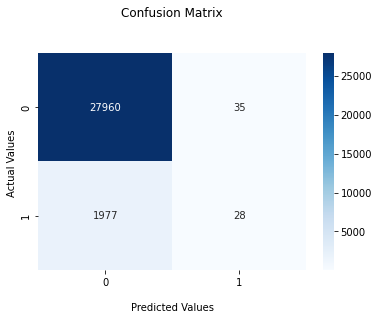

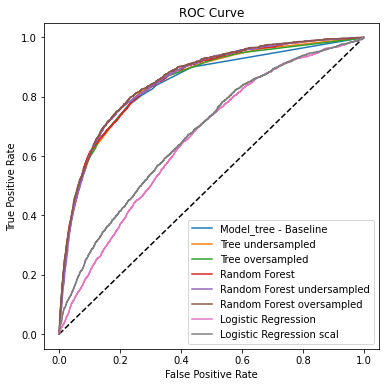

,Model,F1_score,AUC
0,Model_tree - Baseline,0.241715,0.840245
1,Tree undersampled,0.299732,0.847294
2,Tree oversampled,0.300329,0.847061
3,Random Forest,0.000997,0.852048
4,Random Forest undersampled,0.302927,0.853711
5,Random Forest oversampled,0.34189,0.85882
6,Logistic Regression,0.026137,0.658592
7,Logistic Regression scal,0.027079,0.677482


In [63]:
calculate_metrics(lr_scal_model, 'Logistic Regression scal')

F1 score łączy precyzję i czułość. Im wyższy F1 score tym lepszy model.

Jak widać w naszym zestawieniu modeli najlepiej wypada model Random Forest oversampled, jednak w przypadku oversamplingu istnieje ryzyko przeuczenia modelu.

Natomiast wyniki AUC im wyższe, tym lepiej klasyfikator wykonuje dane zadanie i tu poziom jest modeli tree oraz forest są zdecydowanie lepsze od Regresji Logistycznej.